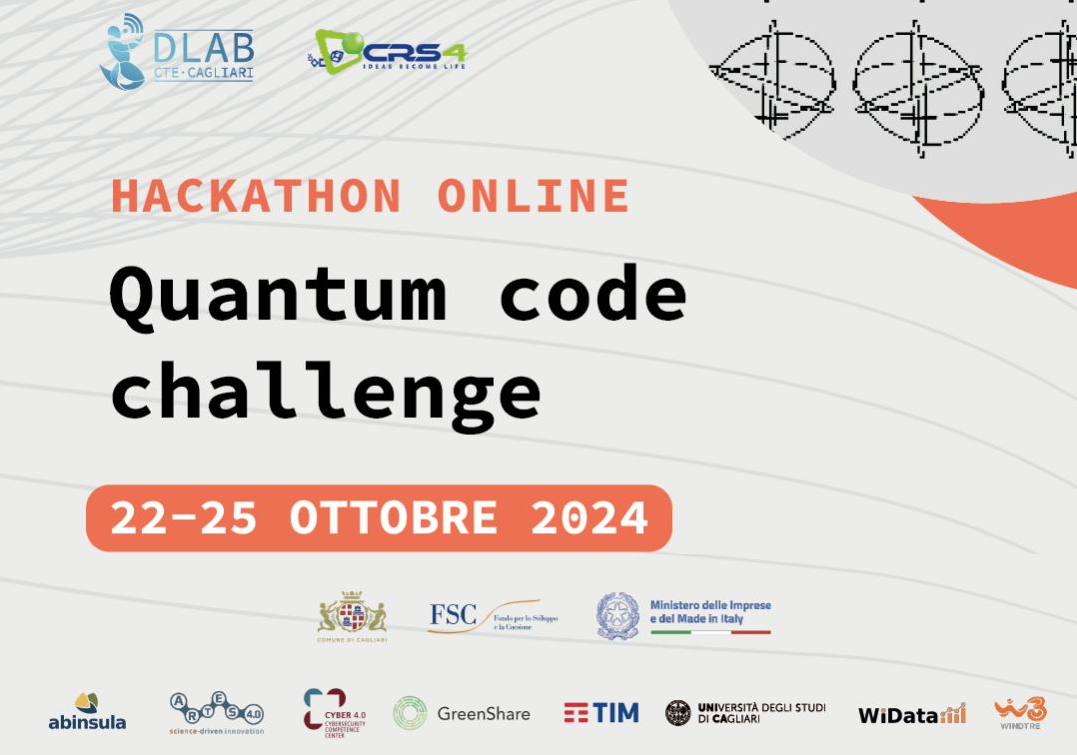

# 07 - Traveling Salesman Problem (TSP) in QUBO form

# Traveling Salesman Problem – TSP

Given a set of clients and corresponding distances between each pair of clients, the problem is to find the shortest possible route such that a salesman visits every client exactly once and returns to the starting point.

More generally, the quantity to be minimized is the total travel cost, which may depend on the traffic conditions, road conditions, direction of travel etc.. In this notebook, for simplicity, we will consider only the geometrical distance. 

In [ ]:
from pyqubo import Array, Constraint, Placeholder, solve_qubo
from dimod import dimod, BQM
import numpy as np
import neal

# Question answer inizialization
num_ques = 20
Ques = np.zeros(num_ques,float)
Ques7 = np.zeros(3,int)

# Number of clients definition
num_clients = 4            

# Arbitrary clients positions set (x and y coordinates)
positions = [[1.0, 2.0, 4.0, 1.0],[1.0, 3.0, 2.0, 0.0]]

# Q7.1 (2 points)

Write the cost matrix as the geometrical distance between each pair of clients, starting from the positions defined above

# Binary variables

Given $N$ clients, we define $N^2$ binary variables $x[i,t]$, where index $i$ represents the client and index $t$ represents the time point the client is visited.
 
$x[i,t]$ = 1 if client $i$ is visited at time point $t$

$x[i,t]$ = 0 otherwise  

In [ ]:
num_steps = num_clients   # Time steps number

x = Array.create('x', shape=(num_clients, num_steps), vartype='BINARY')

# Cost of the tour 

The traveling salesman tour is represented as a sequence of steps from a client $i$ at one time point $k$ to another client $j$ at the next time point.

Starting from the binary variables and the cost matrix defined above, it is possible to write the cost of the tour - which corresponds to the total course distance - in quadratic binary form, as:   
objective = sum(costs[i,j] * x[i,k] * x[..,..] for i in range(...) for j in range(...) for k in range(...) ) 

We let as an exercise to set the correct indexes and their corresponding ranges

# Q7.2 (2 points)

Complete the objective function with the correct indexes and their corresponding ranges

In [ ]:
# Exercise: complete the objective function with the correct indexes and their corresponding ranges
objective = sum(costs[i][j] * x[i, k] * x[..,..] for i in range(num_clients) for j in range(...) for k in range(...))

# Question 7.2:  The "objective" function is written in the form: o[i,j,k,l]*x[i,j]*x[k,l].
Ques[2] = ? # write the coefficient multiplying x[1,2]*x[3,4] in the objective function
Ques[3] = ? # write the coefficient multiplying  x[1,2]*x[1,3] in the objective function
Ques[4] = ? # write the coefficient multiplying  x[1,2]*x[2,3] in the objective function
Ques[5] = ? # write the coefficient multiplying  x[1,2]*x[2,2] in the objective function

# Constraints

Note that by the problem definition, the tour we are considering should obey some constraints:

1) Each node should be visited exactly once (clients satisfaction)
2) Only a single node is visited at each time point (salesman non-ubiquity)

Mathematically, we will express those constraints as follows:
1) $$\sum_{t=0}^{N-1} x[i,t] = 1 \;\;\;\;\; \forall i.$$
2) $$\sum_{i=0}^{N-1} x[i,t[ = 1 \;\;\;\;\; \forall t.$$

The two constraints are imposed by adding to the objective function two penalty terms, that take minimal values when the constraints are satisfied:   

1) $$ \sum_{i=0}^{N-1} \left(1-\sum_{t=0}^{N-1}x[i,t]\right)^2$$
2) $$ \sum_{t=0}^{N-1} \left(1-\sum_{i=0}^{N-1}x[i,t]\right)^2$$


# Q7.3-Q7.5 (2 points each)

Complete the "constraints" expression and identify optimal courses with and without constraints

In [ ]:
constraints = sum((sum(x[i, j] for i in range(num_clients)) - 1)**2 for j in range(num_clients)) + ... # complete the "constraints" expression
# Exercise 4: consider the following courses, identified by the binary variables different from 0: 
# course1:'x[0,0]=1 x[0,1]=1 x[0,2]=1 x[0,3]=1', course2: 'x[0,0]=1 x[1,0]=1 x[2,0]=1 x[3,0]=1' course3:'x[0,0]=1 x[2,1]=1 x[3,2]=1 x[1,3]=1' 

# Question 7.3: In the case of no constraints, which of the following courses would be optimal and how much would be the cost?
Ques[6] = ? # write "1" if course1 is optimal, write "0" otherwise
Ques[7] = ? # write "1" if course2 is optimal, write "0" otherwise
Ques[8] = ? # write "1" if course3 is optimal, write "0" otherwise
Ques[9] = ? # write the minimal cost (value of the objective function for the optimal course)

# Question 7.4: By considering the "clients satisfaction" constraint only, which of the following courses would be optimal and how much would be the cost?
Ques[10] = ? # write "1" if course1 is optimal, write "0" otherwise
Ques[11] = ? # write "1" if course2 is optimal, write "0" otherwise
Ques[12] = ? # write "1" if course3 is optimal, write "0" otherwise
Ques[13] = ? # write the minimal cost (value of the objective function for the optimal course)

# Question 7.5: By considering the "salesman non-ubiquity" constraint only, which of the following courses would be optimal and how much would be the cost?
Ques[14] = ? #  write "1" if course1 is optimal, write "0" otherwise
Ques[15] = ? #  write "1" if course2 is optimal, write "0" otherwise
Ques[16] = ? #  write "1" if course3 is optimal, write "0" otherwise
Ques[17] = ? # write the minimal cost (value of the objective function for the optimal course)

# QUBO model

The QUBO model is built by putting together "objective" and "constraints" and solved by using a simulated annealing sampler

In [ ]:
# QUBO model
H = objective + Placeholder("lambda") * constraints
print('H')
                  
# Model compilation
model = H.compile()
feed_dict = {"lambda": 10.0}
qubo, offset = model.to_qubo(feed_dict=feed_dict)
bqm = dimod.BQM.from_qubo(qubo)

# QUBO problem solution

sampler = neal.SimulatedAnnealingSampler()
SampleSet = sampler.sample(bqm, num_reads = 100)
Route_min = SampleSet.first[0] # route with minimum cost
Emin = SampleSet.first[1] + offset # Cost of the optimal solution

# Q7.6 (2 points)

Evaluate the "degeneracy" of the solutions, i.e. the number of solutions with the same cost

In [ ]:
Ques[18] = ? # write the number of different solutions with the same cost

# Q7.7 (3 points)

Write one of the optimal solutions starting from client 0, as a sequence of clients indexes

In [ ]:
Ques7[0] = ? # second client index (first client index is 0)
Ques7[1] = ? # third client index
Ques7[2] = ? # fourth client index

# Q7.8 (10 points)

How much is the cost of the optimal solution?

In [ ]:
Ques[19] = ? # Emin (N.B.: to get the score, the cost must be correct at least at the third decimal figure)

In [ ]:
grader.check_submission(Ques.tolist(), '7.1')
result1 = grader.submit_exercise(Ques.tolist(), '7.1')

In [ ]:
grader.check_submission(Ques7.tolist(), '7.2')
result1 = grader.submit_exercise(Ques7.tolist(), '7.2')

In [ ]:
grader.check_submission([Emin], '7.3')
result1 = grader.submit_exercise([Emin], '7.3')

After a few minutes, check [the live leaderboard](https://account.qbraid.com/hackathons/2024/crs4) to see how your team ranks!

# 👉 [The real-time leaderboard](https://account.qbraid.com/hackathons/2024/crs4)